In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.cluster import KMeans

## Creating the Datasets

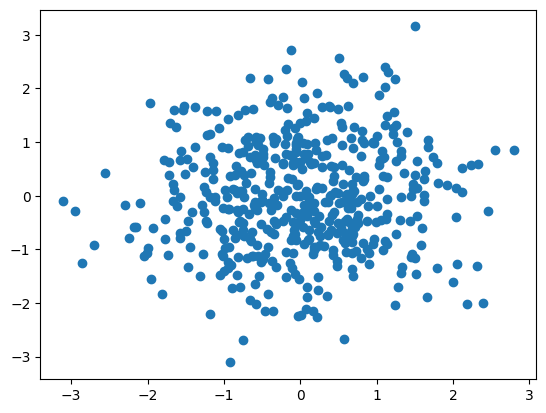

In [35]:
normal_noise = pd.DataFrame()
normal_noise['d1'] = np.random.normal(size=500)
normal_noise['d2'] = np.random.normal(size=500)
normal_noise['target'] = 1
plt.scatter(normal_noise.d1, normal_noise.d2)

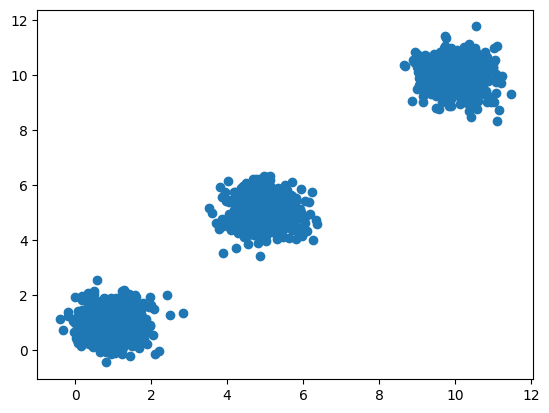

In [36]:
three_blobs = pd.DataFrame()

for loc in [1, 5, 10]:
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc, scale=0.5, size=500)
    aux['d2'] = np.random.normal(loc=loc, scale=0.5, size=500)
    aux['target'] = loc
    
    three_blobs = pd.concat([three_blobs, aux])
    
plt.scatter(three_blobs.d1, three_blobs.d2)

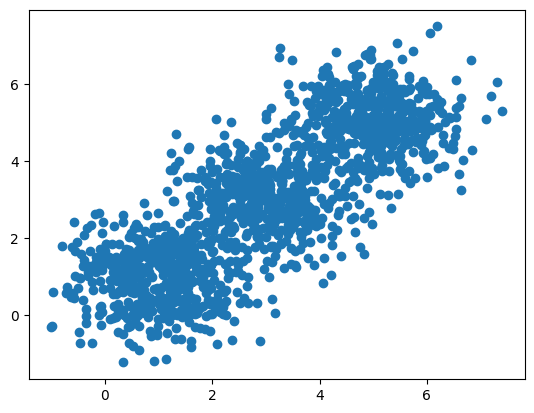

In [37]:
overlapping_blobs = pd.DataFrame()

for loc in [1, 3, 5]:
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc, scale=0.8, size=500)
    aux['d2'] = np.random.normal(loc=loc, scale=0.8, size=500)
    aux['target'] = loc
    
    overlapping_blobs = pd.concat([overlapping_blobs, aux])
    
plt.scatter(overlapping_blobs.d1, overlapping_blobs.d2)

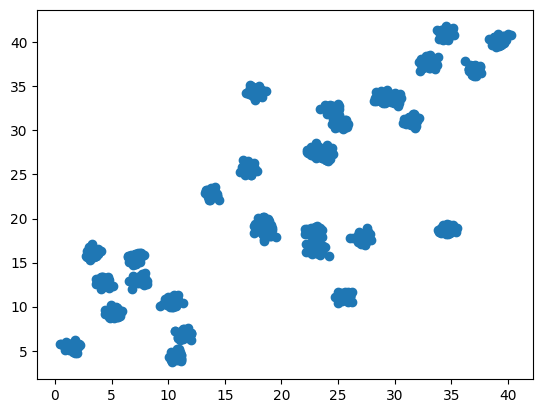

In [38]:
many_blobs = pd.DataFrame()
for i in range(30):
    loc_1 = i + 3 * np.random.normal(2, 2)
    loc_2 = i + 3 * np.random.normal(2, 2)
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc_1, scale=0.35, size=50)
    aux['d2'] = np.random.normal(loc=loc_2, scale=0.35, size=50)
    aux['target'] = i
    
    many_blobs = pd.concat([many_blobs, aux])
    
plt.scatter(many_blobs.d1, many_blobs.d2)

### Plotting the Elbow


100%|███| 30/30 [00:00<00:00, 48.56it/s]

100%|███| 30/30 [00:00<00:00, 59.36it/s]

100%|███| 30/30 [00:00<00:00, 57.34it/s]

100%|███| 30/30 [00:00<00:00, 68.58it/s]


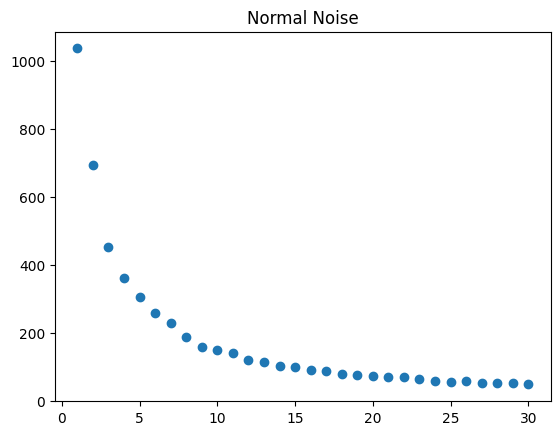

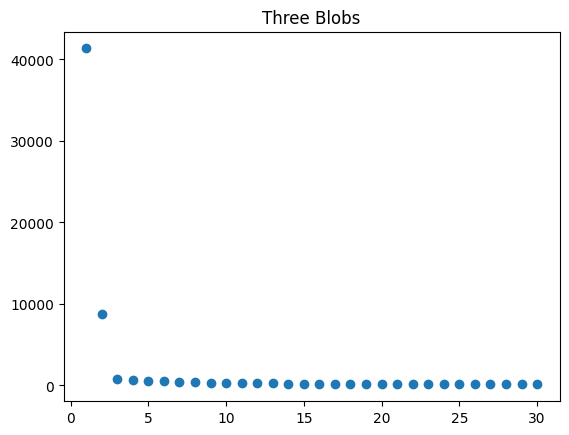

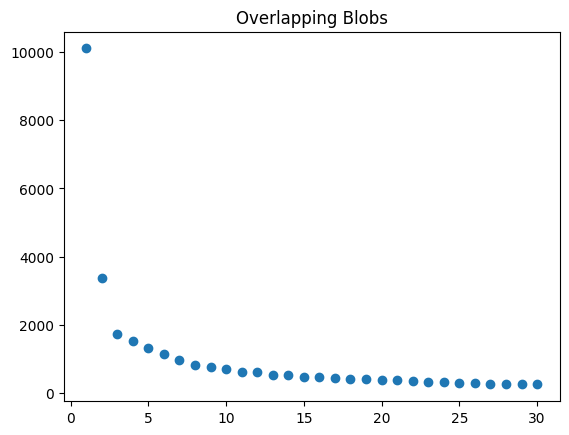

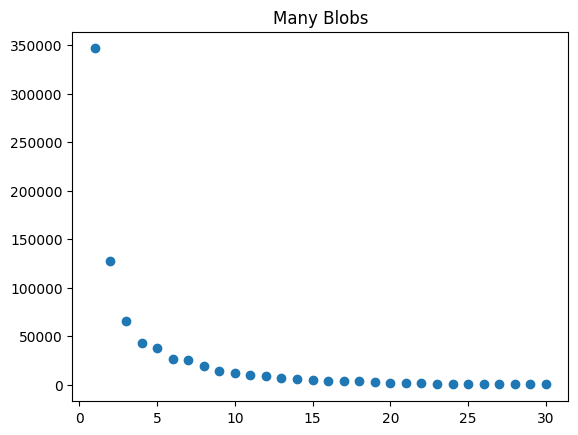

In [40]:
dfs = [normal_noise, three_blobs, overlapping_blobs, many_blobs]
titles = ['Normal Noise', 'Three Blobs', 'Overlapping Blobs', 'Many Blobs']

for i, df in enumerate(dfs):
    inertias = []
    for k in tqdm(range(1,31)):
        model = KMeans(n_clusters=k, n_init='auto')
        model.fit(df.drop(columns=['target']))

        inertias.append(model.inertia_)

    plt.figure()
    plt.title(titles[i])
    plt.scatter([i for i in range(1,31)], inertias)